In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import ISLP
from ISLP import load_data
from mlxtend.plotting import plot_pca_correlation_graph


# Chapter 1 Lab 1: PCA
# Exercise 1
We work on the NCI60 cancer cell line microarray data, which
consists of 6830 gene expression measurements on 64 cancer cell lines.

1) Import the data in a DataFrame and analyse the data

In [51]:
NCI60 = pd.read_csv("data/NCI60.csv", index_col=0)
NCI60

,0,1,2,3,4,5,6,7,8,9,...,6820,6821,6822,6823,6824,6825,6826,6827,6828,6829
label,,,,,,,,,,,,,,,,,,,,,
CNS,0.300000,1.180000,0.550000,1.140000,-0.265000,-7.000000e-02,0.350000,-0.315000,-0.450000,-0.654980,...,-0.990020,0.000000,0.030000,-0.175000,0.629981,-0.030000,0.000000,0.280000,-0.340000,-1.930000
CNS,0.679961,1.289961,0.169961,0.379961,0.464961,5.799610e-01,0.699961,0.724961,-0.040039,-0.285019,...,-0.270058,-0.300039,-0.250039,-0.535039,0.109941,-0.860039,-1.250049,-0.770039,-0.390039,-2.000039
CNS,0.940000,-0.040000,-0.170000,-0.040000,-0.605000,0.000000e+00,0.090000,0.645000,0.430000,0.475019,...,0.319981,0.120000,-0.740000,-0.595000,-0.270020,-0.150000,0.000000,-0.120000,-0.410000,0.000000
RENAL,0.280000,-0.310000,0.680000,-0.810000,0.625000,-1.387779e-17,0.170000,0.245000,0.020000,0.095019,...,-1.240020,-0.110000,-0.160000,0.095000,-0.350019,-0.300000,-1.150010,1.090000,-0.260000,-1.100000
BREAST,0.485000,-0.465000,0.395000,0.905000,0.200000,-5.000000e-03,0.085000,0.110000,0.235000,1.490019,...,0.554980,-0.775000,-0.515000,-0.320000,0.634980,0.605000,0.000000,0.745000,0.425000,0.145000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MELANOMA,-0.030000,-0.480000,0.070000,-0.700000,-0.195000,4.100000e-01,-0.240000,0.105000,-0.410000,0.875019,...,-0.400019,0.150000,-0.430000,0.145000,-0.090020,-0.020000,-1.390010,-1.150000,0.290000,1.190000
MELANOMA,-0.270000,0.630000,-0.100000,1.100000,1.045000,8.000000e-02,-0.090000,-0.675000,-0.310000,0.275019,...,-0.560020,0.200000,0.290000,-0.035000,0.279981,-0.160000,-0.020010,-0.640000,-0.370000,-0.430000
MELANOMA,0.210000,-0.620000,-0.150000,-1.330000,0.045000,-4.000000e-01,-0.390000,-0.675000,-0.360000,0.945020,...,-0.160020,-0.120000,0.850000,-0.125000,0.779980,0.390000,0.000000,0.160000,2.030000,3.940000


2) Perform PCA on the data after scaling the variables (genes) to have
standard deviation one. 


In [52]:
scaler = StandardScaler(with_std=True, with_mean=True)
NCI60_scaled = scaler.fit_transform(NCI60)
covariance_matrix = np.cov(NCI60_scaled, rowvar=False)

pcaNCI = PCA()
scores = pcaNCI.fit_transform(NCI60_scaled)

(By default, the `PCA()`  transform centers the variables to have
mean zero though it does not scale them.) The transform `pcaUS`
can be used to find the PCA
`scores` returned by `fit()`. Once the `fit` method has been called, the `pcaUS` object also contains a number of useful quantities.

3) Plot the first three principal component score vectors, in order to
visualize the data. The observations (cell lines) corresponding to a given
cancer type will be plotted in the same color, so that we can see to what
extent the observations within a cancer type are similar to each other.

In [ ]:
NCI60.index.unique()

Index(['CNS', 'RENAL', 'BREAST', 'NSCLC', 'UNKNOWN', 'OVARIAN', 'MELANOMA',
       'PROSTATE', 'LEUKEMIA', 'K562B-repro', 'K562A-repro', 'COLON',
       'MCF7A-repro', 'MCF7D-repro'],
      dtype='object', name='label')

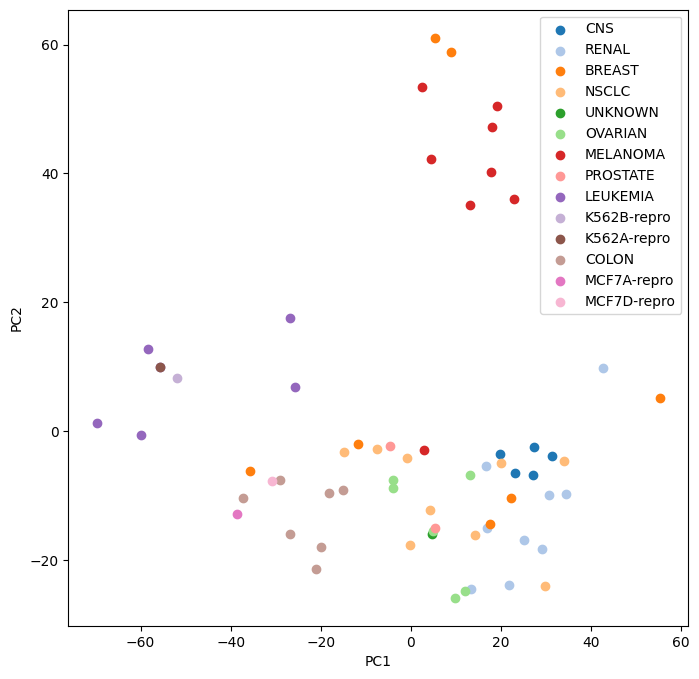

In [54]:
fig, ax = plt.subplots(figsize=(8, 8))
colors = plt.get_cmap("tab20").colors
for i, cancer in enumerate(NCI60.index.unique()):
    indices = np.where(NCI60.index == cancer)[0]
    ax.scatter(
        scores[indices, 0],
        scores[indices, 1],
        color=colors[i],
        label=cancer,
    )
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.legend()
plt.show()

4) Plot the percent variance explained by the principal components as well as the cumulative percent variance explained. Interpert the results. How many components do we keep ?

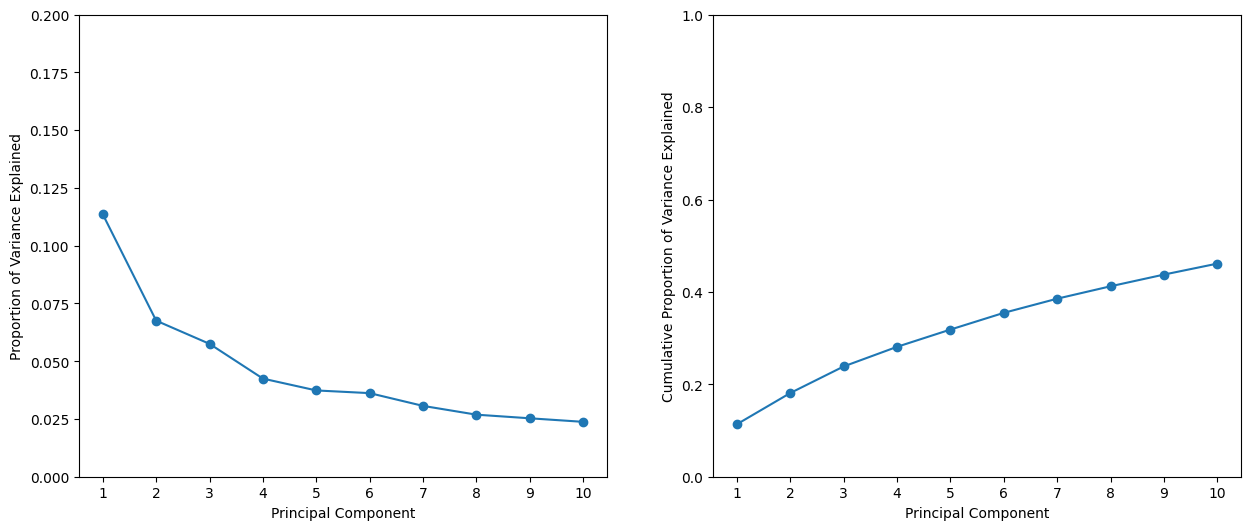

In [55]:
fig, axes = plt.subplots(1, 2, figsize=(15, 6))
ticks = np.arange(pcaNCI.n_components_) + 1

axes[0].plot(ticks[:10], pcaNCI.explained_variance_ratio_[:10], marker="o")
axes[0].set_xlabel("Principal Component")
axes[0].set_ylabel("Proportion of Variance Explained")
axes[0].set_ylim([0, 0.2])
axes[0].set_xticks(ticks[:10])

axes[1].plot(ticks[:10], pcaNCI.explained_variance_ratio_.cumsum()[:10], marker="o")
axes[1].set_xlabel("Principal Component")
axes[1].set_ylabel("Cumulative Proportion of Variance Explained")
axes[1].set_ylim([0, 1])
axes[1].set_xticks(ticks[:10])

plt.show()

5. Plot the correlation Circle and analyse the output.

[(0.297541048894558, -0.02845003581847555), (0.06439940473538681, -0.035986992047948516), (0.16377142320993865, 0.13510556490879574), (-0.09130564897893242, -0.0572722478860409), (0.21384597415155457, 0.053877316355049165), (-0.06313465589100016, 0.20789512888484796), (0.2392161460964587, -0.17962254643292136), (0.13859080544671196, -0.19876098607507173), (0.12612523569890746, -0.01371632686120266), (0.2262568555373479, 0.30999532132846475)]
[ 0.29989319  0.0649085   0.16506608 ...  0.05533558 -0.21872445
 -0.21657757]
[-0.02867494 -0.03627148  0.13617361 ... -0.20290276 -0.05013008
  0.07672855]


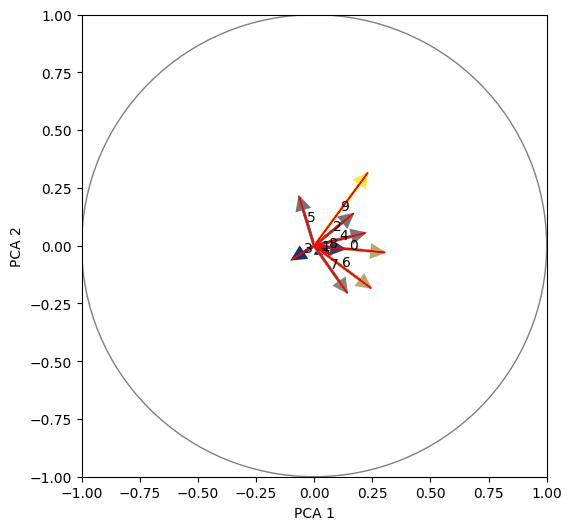

In [56]:
NUM = 10
ccircle = []
eucl_dist = []
X = NCI60.to_numpy()[:, range(NUM)]
for i, j in enumerate(X.T):
    corr1 = np.corrcoef(j, scores[:, 0])[0, 1]
    corr2 = np.corrcoef(j, scores[:, 1])[0, 1]
    ccircle.append((corr1, corr2))
    eucl_dist.append(np.sqrt(corr1**2 + corr2**2))

fig, axs = plt.subplots(figsize=(6, 6))
# for i in enumerate(eucl_dist):
for i in range(NUM):

    arrow_col = plt.cm.cividis(
        (eucl_dist[i] - np.array(eucl_dist).min())
        / (np.array(eucl_dist).max() - np.array(eucl_dist).min())
    )  # pour colorier les flèches
    # suivant la distance
    axs.arrow(
        0,
        0,  # Arrows start at the origin
        ccircle[i][0],  # 0 for PC1
        ccircle[i][1],  # 1 for PC2
        lw=2,  # line width
        length_includes_head=True,
        color=arrow_col,
        fc=arrow_col,
        head_width=0.05,
        head_length=0.05,
    )
    axs.text(ccircle[i][0] / 2, ccircle[i][1] / 2, NCI60.columns[i])
# Draw the unit circle, for clarity
circle = plt.Circle((0, 0), 1, facecolor="none", edgecolor="k", linewidth=1, alpha=0.5)
axs.add_patch(circle)
axs.set_xlabel("PCA 1")
axs.set_ylabel("PCA 2")
axs.set_xlim([-1, 1])
axs.set_ylim([-1, 1])

# Draw the arrow using the formula
for k in range(NUM):
    axs.arrow(
        0,
        0,
        np.sqrt(pcaNCI.explained_variance_[0]) * pcaNCI.components_[0, k],
        np.sqrt(pcaNCI.explained_variance_[1]) * pcaNCI.components_[1, k],
        color="r",
    )

# To check that the correlation is equal with the two methods
print(ccircle)
print(np.sqrt(pcaNCI.explained_variance_[0]) * pcaNCI.components_[0, :])
print(np.sqrt(pcaNCI.explained_variance_[1]) * pcaNCI.components_[1, :])

# Exercise 2 
We will now apply PCA to tree leaf data from https://archive.ics.uci.edu/ml/datasets/Leaf. To do this, we first need to import the data contained in the leaf.csv file. 

1) Import the data and delete the column Specimen Number . You can find on the file readMe some informations abour the data. 
2) Perform PCA on the data after scaling the variables to have standard deviation one. Why Do you need  to standardized the data.
3) How many components do we keep?

4) Display the projections of the data on the first 3 principal axes, using the class label to colour the marks. The class label can be found (in numerical form) in the first leaf column. You need to add an argument to the ax.scatter call to indicate that the colour is obtained from the data,c=... You can find somme help https://sites.google.com/view/aide-python/graphiques/les-graphiques-courbes-et-nuages-de-points-scatter-plot.
5) Display the correlaton circle.

6) Analyze the results.

In [57]:
leaf = pd.read_csv("data/leaf.csv", index_col=0)
leaf

,Specimen_Number,Eccentricity,Aspect Ratio,Elongation,Solidity,Stochastic Convexity,Isoperimetric Factor,Maximal Indentation Depth,Lobedness,Average Intensity,Average Contrast,Smoothness,Third moment,Uniformity,Entropy
Species,,,,,,,,,,,,,,,
1,1,0.72694,1.4742,0.32396,0.98535,1.00000,0.835920,0.004657,0.003947,0.047790,0.127950,0.016108,0.005232,0.000275,1.17560
1,2,0.74173,1.5257,0.36116,0.98152,0.99825,0.798670,0.005242,0.005002,0.024160,0.090476,0.008119,0.002708,0.000075,0.69659
1,3,0.76722,1.5725,0.38998,0.97755,1.00000,0.808120,0.007457,0.010121,0.011897,0.057445,0.003289,0.000921,0.000038,0.44348
1,4,0.73797,1.4597,0.35376,0.97566,1.00000,0.816970,0.006877,0.008607,0.015950,0.065491,0.004271,0.001154,0.000066,0.58785
1,5,0.82301,1.7707,0.44462,0.97698,1.00000,0.754930,0.007428,0.010042,0.007938,0.045339,0.002051,0.000560,0.000024,0.34214
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36,6,0.37522,1.1417,0.81725,0.68511,0.58772,0.125230,0.091860,1.535800,0.114880,0.208610,0.041703,0.013344,0.000820,2.02810
36,7,0.28064,1.0849,0.75319,0.72152,0.71404,0.136860,0.078996,1.135800,0.141220,0.218300,0.045488,0.012002,0.001515,2.40590
36,8,0.35344,1.0329,0.78147,0.70737,0.61579,0.135030,0.089763,1.466400,0.097663,0.207030,0.041101,0.016123,0.000453,1.69350


In [58]:
scaler = StandardScaler(with_std=True, with_mean=True)
leaf_scaled = scaler.fit_transform(leaf)
covariance_matrix = np.cov(leaf_scaled, rowvar=False)

leafNCI = PCA()
scores = leafNCI.fit_transform(leaf_scaled)

In [60]:
leaf.index.unique()

Index([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 22, 23, 24,
       25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36],
      dtype='int64', name='Species')

In [65]:
print(plt.colormaps())

['magma', 'inferno', 'plasma', 'viridis', 'cividis', 'twilight', 'twilight_shifted', 'turbo', 'Blues', 'BrBG', 'BuGn', 'BuPu', 'CMRmap', 'GnBu', 'Greens', 'Greys', 'OrRd', 'Oranges', 'PRGn', 'PiYG', 'PuBu', 'PuBuGn', 'PuOr', 'PuRd', 'Purples', 'RdBu', 'RdGy', 'RdPu', 'RdYlBu', 'RdYlGn', 'Reds', 'Spectral', 'Wistia', 'YlGn', 'YlGnBu', 'YlOrBr', 'YlOrRd', 'afmhot', 'autumn', 'binary', 'bone', 'brg', 'bwr', 'cool', 'coolwarm', 'copper', 'cubehelix', 'flag', 'gist_earth', 'gist_gray', 'gist_heat', 'gist_ncar', 'gist_rainbow', 'gist_stern', 'gist_yarg', 'gnuplot', 'gnuplot2', 'gray', 'hot', 'hsv', 'jet', 'nipy_spectral', 'ocean', 'pink', 'prism', 'rainbow', 'seismic', 'spring', 'summer', 'terrain', 'winter', 'Accent', 'Dark2', 'Paired', 'Pastel1', 'Pastel2', 'Set1', 'Set2', 'Set3', 'tab10', 'tab20', 'tab20b', 'tab20c', 'grey', 'gist_grey', 'gist_yerg', 'Grays', 'magma_r', 'inferno_r', 'plasma_r', 'viridis_r', 'cividis_r', 'twilight_r', 'twilight_shifted_r', 'turbo_r', 'Blues_r', 'BrBG_r', '

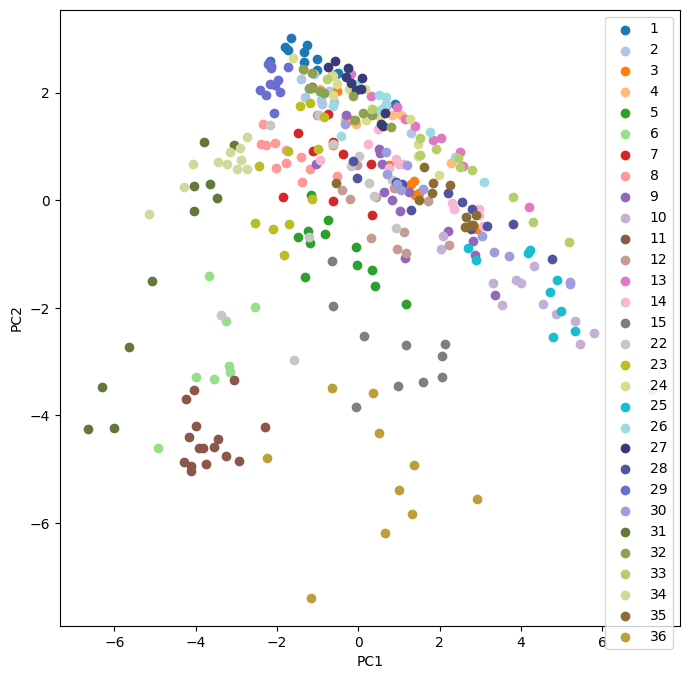

In [71]:
fig, ax = plt.subplots(figsize=(8, 8))
colors = plt.get_cmap("tab20").colors+(plt.get_cmap("tab20b").colors)
for i, species in enumerate(leaf.index.unique()):
    indices = np.where(leaf.index == species)[0]
    ax.scatter(
        scores[indices, 0],
        scores[indices, 1],
        color=colors[i],
        label=species,
    )
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.legend()
plt.show()

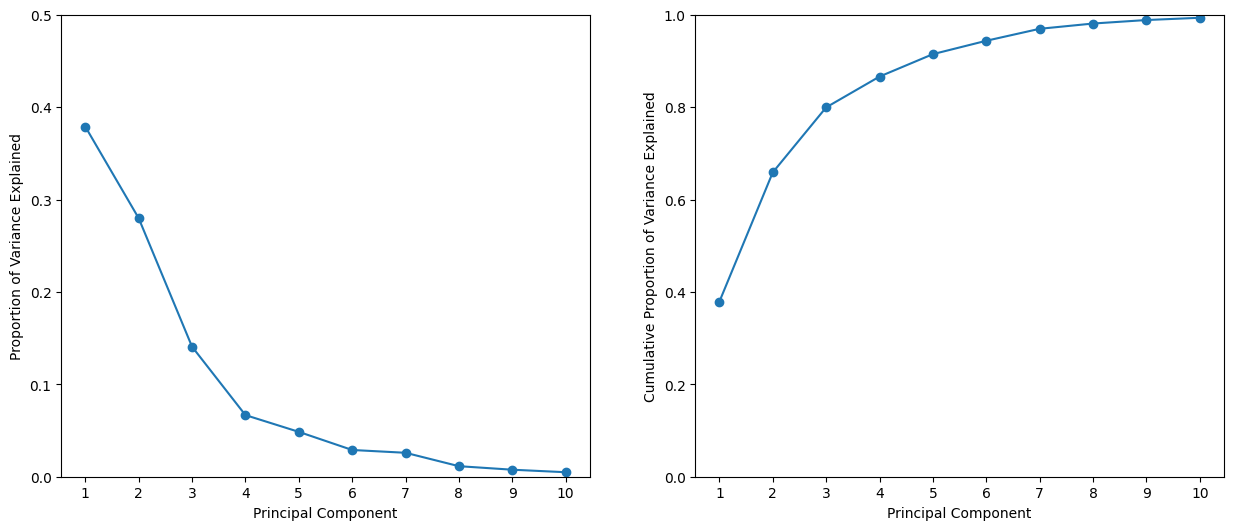

In [75]:
fig, axes = plt.subplots(1, 2, figsize=(15, 6))
ticks = np.arange(leafNCI.n_components_) + 1

axes[0].plot(ticks[:10], leafNCI.explained_variance_ratio_[:10], marker="o")
axes[0].set_xlabel("Principal Component")
axes[0].set_ylabel("Proportion of Variance Explained")
axes[0].set_ylim([0, 0.5])
axes[0].set_xticks(ticks[:10])

axes[1].plot(ticks[:10], leafNCI.explained_variance_ratio_.cumsum()[:10], marker="o")
axes[1].set_xlabel("Principal Component")
axes[1].set_ylabel("Cumulative Proportion of Variance Explained")
axes[1].set_ylim([0, 1])
axes[1].set_xticks(ticks[:10])

plt.show()